### Table of Contents

* [Datasets](#Datasets)
* [Project Description](#pd)
* [Data Description](#dd)
* [Data](#Data) 
  * [Loading Data](#ld)
  * [Data Checks](#dc)

* [Exploratory Data Analysis](#EDA)
  * [Descriptive Statistics](#ds)
  * [missing data](#md)
  * [Univariate and Multivariate Exploration](#ume)
 
* [Data Prep](#dp)
  * [preprocessing](#pp)
 
* [Prediction](#prediction)
  * [model building](#mb)
    * [hyperparameter tuning](#ht)

* [Conclusion](#conclusion)
  * [general comments](#gc)
  * [next steps](#ns)

### Datasets <a class="anchor" id="Datasets"></a>

The data for this project is available on my github repository for this project:

https://github.com/zmxlfrd/Exploring-Mental-Health-Data  

### Data Description <a class="anchor" id="dd"></a>

##### Dataset Overview:
This dataset contains survey responses from individuals regarding various factors that may influence depression. The features include demographic information, professional and academic details, and mental health-related factors, such as sleep duration, dietary habits, work stress, and history of suicidal thoughts. The goal is to predict whether an individual experiences depression, based on these various features.

##### Data Files:
`train.csv`: This file contains the training dataset with both the features and the target variable, depression. The target variable will be used to train the classification model.
`test.csv`: This file contains the test dataset, which lacks the target variable. The objective is to predict the depression status (0 or 1) for each individual in this dataset.

##### Features in `train.csv`:
`id`: A unique identifier for each participant in the survey. <br>
`Name`: The name of the individual (likely non-essential for modeling but might help with data understanding).<br>
`Gender`: The gender of the participant (categorical: Male/Female).<br>
`Age`: The age of the individual (numerical).<br>
`City`: The city where the individual resides (categorical).<br>
`Working Professional or Student`: Indicates whether the individual is a working professional or a student (categorical).<br>
`Profession`: The individual's profession (categorical, could be job-related information like "Teacher," "Chef," etc.).<br>
`Academic Pressure`: The academic pressure faced by the individual (numerical, range not specified).<br>
`Work Pressure`: The work pressure experienced by the individual (numerical).<br>
`CGPA`: The individual's cumulative grade point average (numerical, possibly for students).<br>
`Study Satisfaction`: A measure of the individual's satisfaction with their studies (numerical).<br>
`Job Satisfaction`: A measure of the individual's satisfaction with their job (numerical).<br>
`Sleep Duration`: The amount of sleep the individual gets daily (categorical: e.g., "Less than 5 hours," "5-6 hours," "More than 8 hours").<br>
`Dietary Habits`: A description of the individual’s dietary habits (categorical: e.g., "Healthy," "Unhealthy").<br>
`Degree`: The degree or qualification the individual has attained (categorical: e.g., "BBA," "MCA," "PhD").<br>
`Have you ever had suicidal thoughts?`: A binary indicator (Yes/No) showing if the individual has experienced suicidal thoughts.<br>
`Work/Study Hours`: The number of hours the individual spends working or studying (numerical).<br>
`Financial Stress`: The financial stress experienced by the individual (numerical).<br>
`Family History of Mental Illness`: A binary indicator (Yes/No) showing if the individual has a family history of mental illness.<br>
`Depression`: The target variable (binary: 0 or 1). 0 indicates the individual is not experiencing depression, while 1 indicates they are experiencing depression. This is the response variable we aim to predict.



### Data <a class="anchor" id="Data"></a>

#### Import libraries

In [274]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

#### Visualization Settings

In [275]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 3)

### Loading Data <a class="anchor" id="ld1"></a>

Below the training data is loaded as `train_df`. The data provided is alread split between `train.csv` and `test.csv`. All the data available for training therefore will be located in `train.csv`, this dataset has the predictor variables and the response variable. The `test.csv` on the other hand is made for submissions and is only used for validating the final model and is unlabeled.


In [276]:
import warnings

# remove warnings
warnings.filterwarnings('ignore')

In [277]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

### Data Checks <a class="anchor" id="dc"></a>


In [278]:
train_df.shape

(140700, 20)

The `train_df` has 140,700 rows and 20 columns. The last column is called `Depression` and is the response variable that will be classified. 

In [279]:
train_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [280]:
# remove spaces in column names and add delimiter
train_df.columns = train_df.columns.str.replace(' ', '_')

# rename column to remove special characters
train_df = train_df.rename(columns={'Work/Study_Hours': 'Work_or_Study_Hours'})

In [281]:
test_df.columns = test_df.columns.str.replace(' ', '_')

# rename column to remove special characters
test_df = test_df.rename(columns={'Work/Study_Hours': 'Work_or_Study_Hours'})

In [282]:
# check the datatypes of each feature
train_df.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working_Professional_or_Student           object
Profession                                object
Academic_Pressure                        float64
Work_Pressure                            float64
CGPA                                     float64
Study_Satisfaction                       float64
Job_Satisfaction                         float64
Sleep_Duration                            object
Dietary_Habits                            object
Degree                                    object
Have_you_ever_had_suicidal_thoughts_?     object
Work_or_Study_Hours                      float64
Financial_Stress                         float64
Family_History_of_Mental_Illness          object
Depression                                 int64
dtype: object

In [283]:
train_df.tail()

,id,Name,Gender,Age,City,Working_Professional_or_Student,Profession,Academic_Pressure,Work_Pressure,CGPA,Study_Satisfaction,Job_Satisfaction,Sleep_Duration,Dietary_Habits,Degree,Have_you_ever_had_suicidal_thoughts_?,Work_or_Study_Hours,Financial_Stress,Family_History_of_Mental_Illness,Depression
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0
140699,140699,Sai,Male,27.0,Patna,Student,NaN,4.0,NaN,9.24,1.0,NaN,Less than 5 hours,Healthy,BCA,Yes,2.0,3.0,Yes,1


### Exploratory Data Analysis <a class="anchor" id="EDA"></a>

#### Descriptive Statistics

We now look at the Summary Statistics of both the numerical and categorical data. This will help in understanding the basic properties of the dataset and gives an idea of the data's distribution.

##### Summary statistics of numerical variables

In [284]:
print(train_df.describe())

                  id            Age  Academic_Pressure  Work_Pressure  \
count  140700.000000  140700.000000       27897.000000  112782.000000   
mean    70349.500000      40.388621           3.142273       2.998998   
std     40616.735775      12.384099           1.380457       1.405771   
min         0.000000      18.000000           1.000000       1.000000   
25%     35174.750000      29.000000           2.000000       2.000000   
50%     70349.500000      42.000000           3.000000       3.000000   
75%    105524.250000      51.000000           4.000000       4.000000   
max    140699.000000      60.000000           5.000000       5.000000   

               CGPA  Study_Satisfaction  Job_Satisfaction  \
count  27898.000000        27897.000000     112790.000000   
mean       7.658636            2.944940          2.974404   
std        1.464466            1.360197          1.416078   
min        5.030000            1.000000          1.000000   
25%        6.290000            2.0000

It is worth noting that not all columns have 140700 records. This means that there are predictor variables with missing values

##### Summary statistics of categorical data

In [285]:
print(train_df['Gender'].value_counts())

Gender
Male      77464
Female    63236
Name: count, dtype: int64


The gender distribution is fairly balanced

In [286]:
print(train_df['Family_History_of_Mental_Illness'].value_counts())

Family_History_of_Mental_Illness
No     70758
Yes    69942
Name: count, dtype: int64


In [287]:
print(train_df['Working_Professional_or_Student'].value_counts())

Working_Professional_or_Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64


In [288]:
print(train_df['Have_you_ever_had_suicidal_thoughts_?'].value_counts())

Have_you_ever_had_suicidal_thoughts_?
No     71138
Yes    69562
Name: count, dtype: int64


In [289]:
print(train_df['Dietary_Habits'].value_counts())

Dietary_Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64


.

It looks like the Dietary_Habits column contains several unexpected or erroneous categories, such as "Yes", "No", "Male", "Electrician", and others that don't seem related to dietary habits. This can be an issue because these values don't align with the typical categories for dietary habits like "Healthy", "Unhealthy", or "Moderate". These are a small number of records so I will treat them as missing data.

In [290]:
# replace invalid entries with NaN
valid_dietary_habits = ['Healthy', 'Unhealthy', 'Moderate']
train_df['Dietary_Habits'] = train_df['Dietary_Habits'].apply(lambda x: x if x in valid_dietary_habits else None)

print(train_df['Dietary_Habits'].value_counts())

Dietary_Habits
Moderate     49705
Unhealthy    46227
Healthy      44741
Name: count, dtype: int64


In [291]:
test_df['Dietary_Habits'] = test_df['Dietary_Habits'].apply(lambda x: x if x in valid_dietary_habits else None)

In [292]:
print(train_df['Sleep_Duration'].value_counts())

Sleep_Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [293]:
valid_sleep_durations = [
    'Less than 5 hours', '1-2 hours', '2-3 hours', '3-4 hours', '4-5 hours',
    '5-6 hours', '6-7 hours', '7-8 hours', '8-9 hours', '9-11 hours', '10-11 hours',
    'More than 8 hours'
]

sleep_duration_mapping = {
    'Less than 5 hours': 4,
    '1-2 hours': 1.5,
    '2-3 hours': 2.5,
    '3-4 hours': 3.5,
    '4-5 hours': 4.5,
    '5-6 hours': 5.5,
    '6-7 hours': 6.5,
    '7-8 hours': 7.5,
    '8-9 hours': 8.5,
    '9-11 hours': 10,
    '10-11 hours': 10.5,
    'More than 8 hours': 9
}

# Replace invalid entries with NaN
train_df['Sleep_Duration'] = train_df['Sleep_Duration'].apply(lambda x: x if x in valid_sleep_durations else np.nan)

# Map valid entries to numerical values
train_df['Sleep_Duration'] = train_df['Sleep_Duration'].map(sleep_duration_mapping)

print(train_df['Sleep_Duration'].value_counts())

Sleep_Duration
4.0     38784
7.5     36969
9.0     32726
5.5     32142
3.5        12
6.5         8
4.5         7
2.5         5
10.5        2
8.5         2
10.0        2
1.5         1
Name: count, dtype: int64


In [294]:
test_df['Sleep_Duration'] = test_df['Sleep_Duration'].apply(lambda x: x if x in valid_sleep_durations else np.nan)

test_df['Sleep_Duration'] = test_df['Sleep_Duration'].map(sleep_duration_mapping)

I could have included some of this step in preprocessing but I will just do it here.

In [295]:
train_df['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [296]:
valid_degrees = [
    "BHM", "LLB", "B.Pharm", "BBA", "MCA", "MD", "BSc", "ME", "B.Arch",
    "BCA", "BE", "MA", "B.Ed", "B.Com", "MBA", "M.Com", "MHM", "BA",
    "Class 12", "M.Tech", "PhD", "M.Ed", "MSc", "B.Tech", "LLM", "MBBS",
    "M.Pharm", "MPA", "BEd", "B.Sc", "M.Arch", "BArch", "Class 11"
]

degree_mapping = {
    "B.Sc": "BSc", "B.Sc.": "BSc", "BEd": "B.Ed", "M.Tech": "M.Tech",
    "MSc": "MSc", "PhD": "PhD", "MEd": "M.Ed", "B.Tech": "B.Tech",
    "BE": "B.E.", "B.Arch": "B.Arch", "M.Com": "M.Com", "B.Com": "B.Com",
    "BHM": "BHM", "LLB": "LLB", "BA": "BA", "MBA": "MBA", "M.Arch": "M.Arch"
}

train_df['Degree'] = train_df['Degree'].replace(degree_mapping)

# Replace values that aren't in the list of valid degrees with NaN
train_df['Degree'] = train_df['Degree'].apply(lambda x: x if x in valid_degrees else np.nan)

train_df['Degree'].value_counts()

Degree
Class 12    14729
B.Ed        11693
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5670
MCA          5234
BBA          5030
BSc          5030
MSc          4879
LLM          4647
M.Pharm      4537
M.Tech       4475
B.Tech       4425
LLB          4348
BHM          4305
MBA          3818
BA           3750
ME           3632
MD           3383
MHM          3286
PhD          3103
M.Com        3094
MBBS         3082
MA           2887
M.Arch          5
BArch           2
MPA             1
Class 11        1
Name: count, dtype: int64

In [297]:
test_df['Degree'] = test_df['Degree'].replace(degree_mapping)

test_df['Degree'] = test_df['Degree'].apply(lambda x: x if x in valid_degrees else np.nan)

#### Missing Data

In [298]:
train_df.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working_Professional_or_Student               0
Profession                                36630
Academic_Pressure                        112803
Work_Pressure                             27918
CGPA                                     112802
Study_Satisfaction                       112803
Job_Satisfaction                          27910
Sleep_Duration                               40
Dietary_Habits                               27
Degree                                     3204
Have_you_ever_had_suicidal_thoughts_?         0
Work_or_Study_Hours                           0
Financial_Stress                              4
Family_History_of_Mental_Illness              0
Depression                                    0
dtype: int64

                           id       Age  Academic_Pressure  Work_Pressure  \
id                   1.000000  0.001850           0.005597       0.003086   
Age                  0.001850  1.000000          -0.075956      -0.098924   
Academic_Pressure    0.005597 -0.075956           1.000000            NaN   
Work_Pressure        0.003086 -0.098924                NaN       1.000000   
CGPA                -0.011869  0.005129          -0.025195            NaN   
Study_Satisfaction   0.007824  0.008862          -0.112228            NaN   
Job_Satisfaction     0.002774  0.030793          -1.000000      -0.036958   
Sleep_Duration      -0.001838  0.050756          -0.042247      -0.021917   
Work_or_Study_Hours  0.002359 -0.118356           0.095650      -0.002808   
Financial_Stress    -0.000340 -0.083589           0.152105       0.024412   
Depression           0.003944 -0.564671           0.475037       0.216634   

                         CGPA  Study_Satisfaction  Job_Satisfaction  \
id  

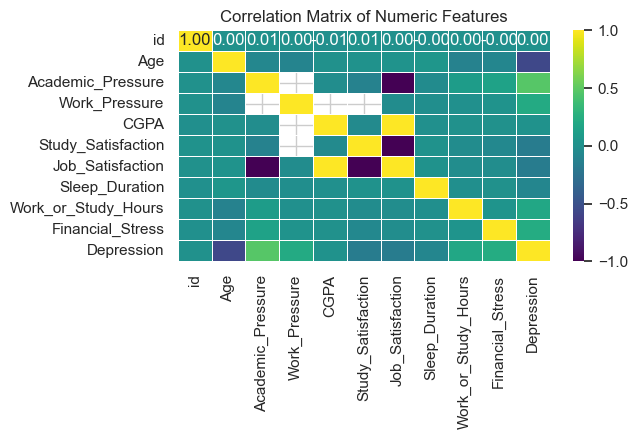

In [299]:
# Select only numeric columns
numeric_cols_train = train_df.select_dtypes(include='number')

correlation_matrix_train = numeric_cols_train.corr()
print(correlation_matrix_train)

sns.heatmap(correlation_matrix_train, annot=True, cmap='viridis', fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

##### Key Correlations with Depression
`Age`: Shows a negative correlation with Depression (-0.564671), suggesting that younger individuals in the dataset might be more associated with depression than older ones.<br>
`Academic Pressure`: Has a positive correlation (0.475037), indicating that higher academic pressure might be linked to increased levels of depression. <br>
`Work Pressure`: Also shows a positive correlation with Depression (0.216634), which may indicate a similar association between work stress and depression.<br>
`Financial Stress`: Has a moderate positive correlation (0.227237), suggesting that financial stress could be a contributing factor to depression.<br>
<br>
##### Other Feature Interactions
`CGPA`, `Study Satisfaction`, and `Job Satisfaction`: These show interesting patterns with each other and with Depression. For instance, `Study Satisfaction` and `Job Satisfaction` are highly correlated, and both have negative associations with `Depression`.<br>
<br>
None of the columns seem to be insignificant enough to ignore and drop. Therefore, it is better to explore alternative method to cleaning them. 

In [300]:
from scipy.stats import chi2_contingency

# List of categorical columns to check
categorical_cols = ['Gender', 'City', 'Working_Professional_or_Student', 
                    'Profession', 'Dietary_Habits', 'Degree', 
                    'Have_you_ever_had_suicidal_thoughts_?', 'Family_History_of_Mental_Illness']

# Loop through each categorical column to run chi-square test
for col in categorical_cols:
    contingency_table = pd.crosstab(train_df[col], train_df['Depression'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p}")

Gender: p-value = 0.0023046498245997494
City: p-value = 1.762928945982822e-174
Working_Professional_or_Student: p-value = 0.0
Profession: p-value = 4.873701297845742e-256
Dietary_Habits: p-value = 0.0
Degree: p-value = 0.0
Have_you_ever_had_suicidal_thoughts_?: p-value = 0.0
Family_History_of_Mental_Illness: p-value = 6.296449268433189e-10


<br>The chi-square test results indicate that all these categorical variables have very low p-values (much lower than the typical significance threshold of 0.05). This suggests a statistically significant association between each of these categorical variables and the target variable, `Depression`

In [301]:
train_df.notna().sum()

id                                       140700
Name                                     140700
Gender                                   140700
Age                                      140700
City                                     140700
Working_Professional_or_Student          140700
Profession                               104070
Academic_Pressure                         27897
Work_Pressure                            112782
CGPA                                      27898
Study_Satisfaction                        27897
Job_Satisfaction                         112790
Sleep_Duration                           140660
Dietary_Habits                           140673
Degree                                   137496
Have_you_ever_had_suicidal_thoughts_?    140700
Work_or_Study_Hours                      140700
Financial_Stress                         140696
Family_History_of_Mental_Illness         140700
Depression                               140700
dtype: int64

In [ ]:
# Drop `Academic_Pressure`, `CGPA` and `Study_Satisfaction` for too many missing values
train_df.drop(columns=['Academic_Pressure', 'CGPA', 'Degree', 'City', 'Degree', 'Profession', 'Study_Satisfaction'], inplace=True)

# Fill missing values in 'Work_Pressure', 'Financial_Stress' and 'Job_Satisfaction' with the mean
train_df['Work_Pressure'].fillna(train_df['Work_Pressure'].mean(), inplace=True)
train_df['Job_Satisfaction'].fillna(train_df['Job_Satisfaction'].mean(), inplace=True)
train_df['Financial_Stress'].fillna(train_df['Financial_Stress'].mean(), inplace=True)
train_df['Sleep_Duration'].fillna(train_df['Sleep_Duration'].mean(), inplace=True)

# Fill missing values in 'Dietary_Habits', 'Degree' with the mode 
train_df['Dietary_Habits'].fillna(train_df['Dietary_Habits'].mode()[0], inplace=True)

In [304]:
test_df.drop(columns=['Academic_Pressure', 'CGPA', 'City', 'Degree', 'Profession', 'Study_Satisfaction'], inplace=True)

test_df['Work_Pressure'].fillna(test_df['Work_Pressure'].mean(), inplace=True)
test_df['Job_Satisfaction'].fillna(test_df['Job_Satisfaction'].mean(), inplace=True)
test_df['Financial_Stress'].fillna(test_df['Financial_Stress'].mean(), inplace=True)
test_df['Sleep_Duration'].fillna(test_df['Sleep_Duration'].mean(), inplace=True)

test_df['Dietary_Habits'].fillna(test_df['Dietary_Habits'].mode()[0], inplace=True)

In [305]:
train_df.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
Working_Professional_or_Student          0
Work_Pressure                            0
Job_Satisfaction                         0
Sleep_Duration                           0
Dietary_Habits                           0
Have_you_ever_had_suicidal_thoughts_?    0
Work_or_Study_Hours                      0
Financial_Stress                         0
Family_History_of_Mental_Illness         0
Depression                               0
dtype: int64

#### Univariate and Multivariate Exploration <a class="anchor" id="ume"></a>

##### Univariate Exploration
Univariate exploration involves analyzing individual features to understand their distribution and key statistics. This is particularly useful for categorical and numerical features.
1. Distribution of `Age`

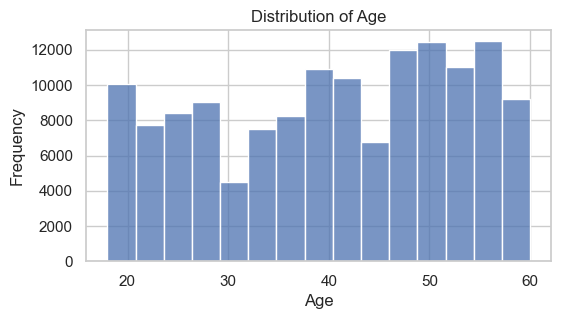

In [306]:
sns.histplot(train_df['Age'], bins=15)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

2. Distribution of `Financial_Stress`

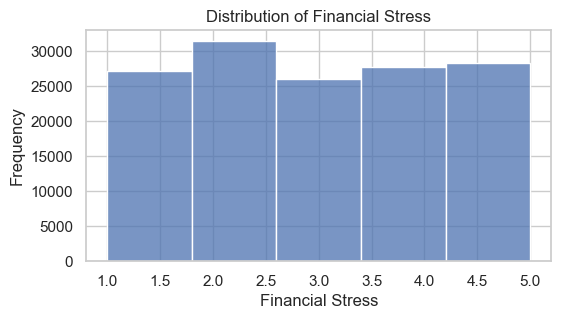

In [307]:
sns.histplot(train_df['Financial_Stress'], bins=5)
plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Frequency')
plt.show()

3. Distribution of `Work_or_Study_Hours`

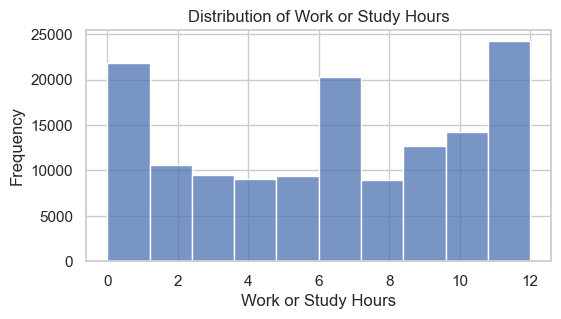

In [308]:
sns.histplot(train_df['Work_or_Study_Hours'], bins=10)
plt.title('Distribution of Work or Study Hours')
plt.xlabel('Work or Study Hours')
plt.ylabel('Frequency')
plt.show()

4. Count plot for `Gender`

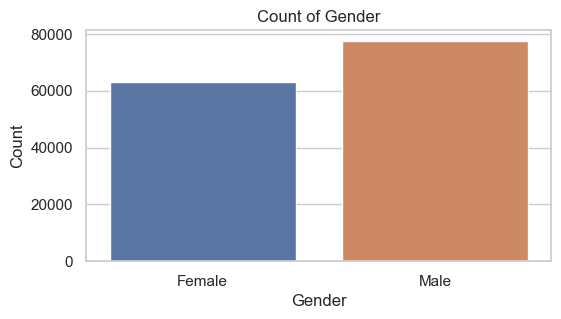

In [309]:
sns.countplot(data=train_df, x='Gender')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

5. Count plot for `Have_you_ever_had_suicidal_thoughts_?`

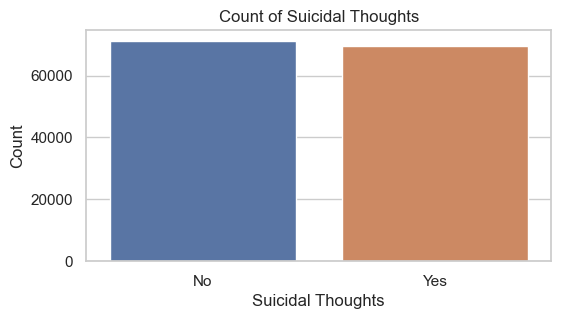

In [310]:
sns.countplot(data=train_df, x='Have_you_ever_had_suicidal_thoughts_?')
plt.title('Count of Suicidal Thoughts')
plt.xlabel('Suicidal Thoughts')
plt.ylabel('Count')
plt.show()

5. Distribution of `Sleep_Duration`

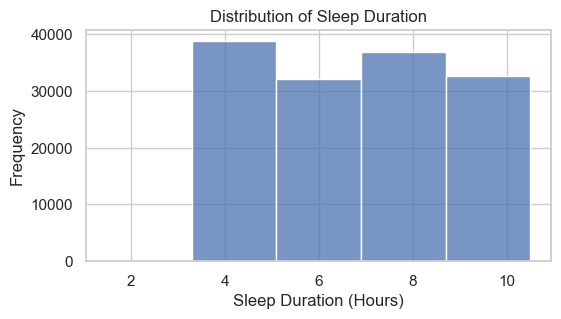

In [311]:
sns.histplot(train_df['Sleep_Duration'], bins=5)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (Hours)')
plt.ylabel('Frequency')
plt.show()

##### Multivariate Exploration
For multivariate analysis, we'll visualize the relationships between the features and the target variable, Depression.

1. `Age` vs `Depression`

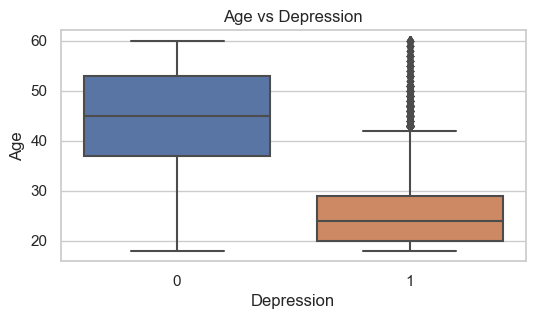

In [312]:
sns.boxplot(x='Depression', y='Age', data=train_df)
plt.title('Age vs Depression')
plt.xlabel('Depression')
plt.ylabel('Age')
plt.show()

2. `Financial_Stress` vs `Depression`

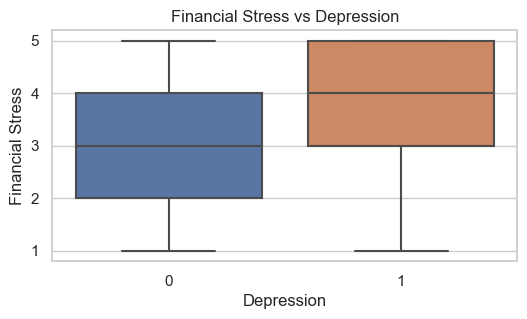

In [313]:
sns.boxplot(x='Depression', y='Financial_Stress', data=train_df)
plt.title('Financial Stress vs Depression')
plt.xlabel('Depression')
plt.ylabel('Financial Stress')
plt.show()

3. `Gender` vs `Depression`

AttributeError: 'numpy.int64' object has no attribute 'startswith'

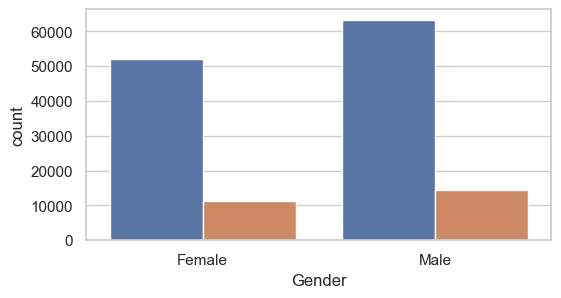

In [314]:
sns.countplot(data=train_df, x='Gender', hue='Depression')
plt.title('Gender vs Depression')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

4. `Work_or_Study_Hours` vs `Depression`

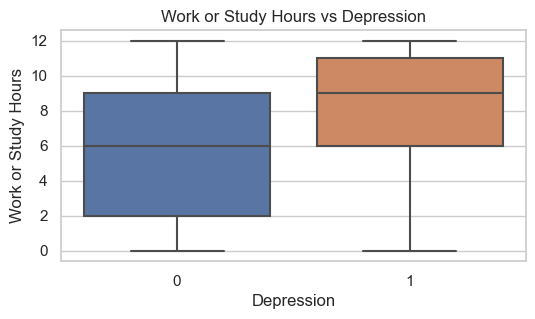

In [315]:
sns.boxplot(x='Depression', y='Work_or_Study_Hours', data=train_df)
plt.title('Work or Study Hours vs Depression')
plt.xlabel('Depression')
plt.ylabel('Work or Study Hours')
plt.show()

5. `Sleep_Duration' vs `Depression`

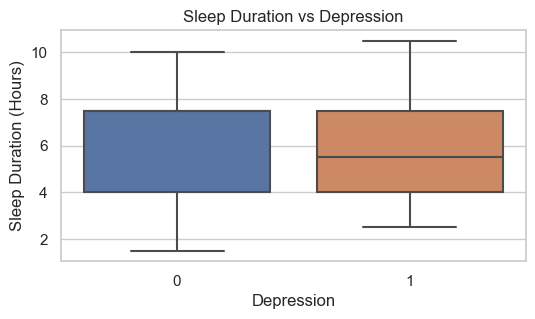

In [316]:
sns.boxplot(data=train_df, x='Depression', y='Sleep_Duration')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Depression')
plt.ylabel('Sleep Duration (Hours)')
plt.show()

### Data Prep <a class="anchor" id="dp"></a>

#### Preprocessing <a class="anchor" id="pp"></a>

##### Standardize Numeric Features

In [317]:
scaler = StandardScaler()
df_scaled_train = train_df[['Age', 'Work_Pressure', 'Job_Satisfaction', 'Sleep_Duration', 'Work_or_Study_Hours', 'Financial_Stress']]

df_scaled_train = pd.DataFrame(scaler.fit_transform(df_scaled_train), columns=df_scaled_train.columns)

min_max_scaler = MinMaxScaler()
df_normalized_train = min_max_scaler.fit_transform(df_scaled_train)

In [318]:
df_scaled_test = test_df[['Age', 'Work_Pressure', 'Job_Satisfaction', 'Sleep_Duration', 'Work_or_Study_Hours', 'Financial_Stress']]

df_scaled_test = pd.DataFrame(scaler.fit_transform(df_scaled_test), columns=df_scaled_test.columns)

df_normalized_test = min_max_scaler.fit_transform(df_scaled_test)

##### Convert Categorical Data into Numerical

The machine learning models we are going to use require all input data to be numeric, so we need to handle categorical variables. For columns like Gender, City, Profession, Degree, etc., we re going to use Label Encoding for binary columns and One-hot Encoding for multi-category features.

In [319]:
categorical_columns = ['Gender', 'Working_Professional_or_Student', 'Have_you_ever_had_suicidal_thoughts_?', 'Dietary_Habits', 'Family_History_of_Mental_Illness']

for col in categorical_columns:
    train_df[col] = train_df[col].astype(str)

# One-hot Encoding
train_df = pd.get_dummies(train_df, columns=categorical_columns, drop_first=True)

In [320]:
for col in categorical_columns:
    test_df[col] = test_df[col].astype(str)

# One-hot Encoding
test_df = pd.get_dummies(test_df, columns=categorical_columns, drop_first=True)

We need to scale the features to ensure that all features contribute equally to the response variables.

In [321]:
train_df.head()

,id,Name,Age,Work_Pressure,Job_Satisfaction,Sleep_Duration,Work_or_Study_Hours,Financial_Stress,Depression,Gender_Male,Working_Professional_or_Student_Working Professional,Have_you_ever_had_suicidal_thoughts_?_Yes,Dietary_Habits_Moderate,Dietary_Habits_Unhealthy,Family_History_of_Mental_Illness_Yes
0,0,Aaradhya,49.0,5.000000,2.000000,9.0,1.0,2.0,0,False,True,False,False,False,False
1,1,Vivan,26.0,4.000000,3.000000,4.0,7.0,3.0,1,True,True,True,False,True,False
2,2,Yuvraj,33.0,2.998998,2.974404,5.5,3.0,1.0,1,True,False,True,False,False,False
3,3,Yuvraj,22.0,5.000000,1.000000,4.0,10.0,1.0,1,True,True,True,True,False,True
4,4,Rhea,30.0,1.000000,1.000000,5.5,9.0,4.0,0,False,True,True,False,True,True


In [322]:
train_df = train_df.applymap(lambda x: 1 if x == True else (0 if x == False else x))

In [323]:
test_df = test_df.applymap(lambda x: 1 if x == True else (0 if x == False else x))

In [324]:
train_df.head()

,id,Name,Age,Work_Pressure,Job_Satisfaction,Sleep_Duration,Work_or_Study_Hours,Financial_Stress,Depression,Gender_Male,Working_Professional_or_Student_Working Professional,Have_you_ever_had_suicidal_thoughts_?_Yes,Dietary_Habits_Moderate,Dietary_Habits_Unhealthy,Family_History_of_Mental_Illness_Yes
0,0,Aaradhya,49.0,5.000000,2.000000,9.0,1.0,2.0,0,0,1,0,0,0,0
1,1,Vivan,26.0,4.000000,3.000000,4.0,7.0,3.0,1,1,1,1,0,1,0
2,2,Yuvraj,33.0,2.998998,2.974404,5.5,3.0,1.0,1,1,0,1,0,0,0
3,3,Yuvraj,22.0,5.000000,1.000000,4.0,10.0,1.0,1,1,1,1,1,0,1
4,4,Rhea,30.0,1.000000,1.000000,5.5,9.0,4.0,0,0,1,1,0,1,1


### Prediction <a class="anchor" id="Prediction"></a>

The goal is to build a robust classification model and evaluate its performance effectively in predicting a binary outcome (whether someone is experiencing depression or not).

In [325]:
# Selecting features and target variable
X_train = train_df.drop(columns=['id', 'Name', 'Depression'])
y_train = train_df['Depression']

# Split the training data into training and validation sets (80-20 split)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

#### Model Building <a class="anchor" id="mb"></a>
##### 1. Random Forest Classifier 

In [326]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_split, y_train_split)

y_val_pred_rf = rf_model.predict(X_val_split)

print("Random Forest - Classification Report:")
print(classification_report(y_val_split, y_val_pred_rf))

# Calculate ROC-AUC score
y_pred_prob = rf_model.predict_proba(X_val_split)[:, 1]
roc_auc_rf = roc_auc_score(y_val_split, rf_model.predict_proba(X_val_split)[:, 1])
print(f"Random Forest - ROC-AUC Score: {roc_auc_rf}")

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22986
           1       0.80      0.76      0.78      5154

    accuracy                           0.92     28140
   macro avg       0.87      0.86      0.87     28140
weighted avg       0.92      0.92      0.92     28140

Random Forest - ROC-AUC Score: 0.9616597705657483


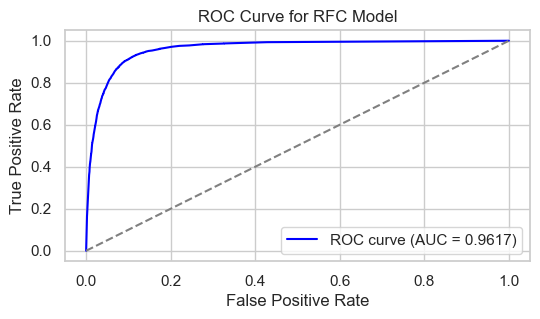

In [327]:
# Get the fpr (false positive rate), tpr (true positive rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_val_split, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for RFC Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

<br>
Random Forest Model Results:<br>
Accuracy: 93%<br>
Precision (Class 0): 0.95 (The model is highly accurate in predicting class 0 (not depressed) as not depressed.)<br>
Recall (Class 0): 0.96 (The model successfully identifies 96% of actual non-depressed individuals.)<br>
Precision (Class 1): 0.82 (The model correctly identifies depressed individuals 82% of the time.)<br>
Recall (Class 1): 0.77 (The model successfully identifies 77% of actual depressed individuals.)<br>
F1-Score (Class 0): 0.96 (Balanced performance in predicting non-depressed individuals.)<br>
F1-Score (Class 1): 0.79 (Moderate balance between precision and recall for depressed individuals.)<br>
ROC-AUC Score: 0.968 (This indicates excellent performance, as the ROC-AUC score is closer to 1, showing good distinction between the two classes.)<br>

##### 2. Logistic Regression

In [328]:
lr_model = LogisticRegression(random_state=42)

lr_model.fit(X_train_split, y_train_split)

y_val_pred_lr = lr_model.predict(X_val_split)

print("Logistic Regression - Classification Report:")
print(classification_report(y_val_split, y_val_pred_lr))

# Calculate ROC-AUC score
y_pred_prob2 = lr_model.predict_proba(X_val_split)[:, 1]
roc_auc_lr = roc_auc_score(y_val_split, y_pred_prob2)
print(f"Logistic Regression - ROC-AUC Score: {roc_auc_lr}")

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     22986
           1       0.81      0.78      0.80      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.87      0.88     28140
weighted avg       0.93      0.93      0.93     28140

Logistic Regression - ROC-AUC Score: 0.9695102746991042


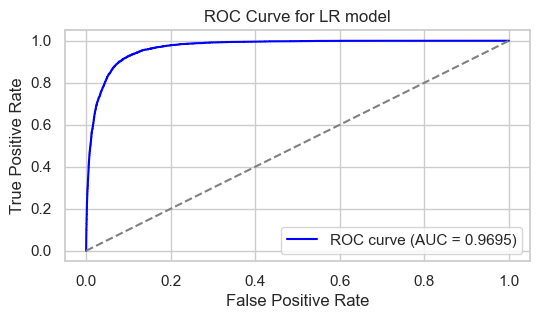

In [329]:
# Get the fpr (false positive rate), tpr (true positive rate), and thresholds
fpr2, tpr2, thresholds2 = roc_curve(y_val_split, y_pred_prob2)

# Plot ROC curve
plt.plot(fpr2, tpr2, color='blue', label=f'ROC curve (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve for LR model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Logistic Regression Model Results:<br>
Accuracy: 93% <br>
Precision (Class 0): 0.95 (Similar performance in predicting non-depressed individuals as Random Forest.)<br>
Recall (Class 0): 0.96 (Similarly, high recall for class 0.)<br>
Precision (Class 1): 0.82 (Same precision for class 1 as Random Forest.)<br>
Recall (Class 1): 0.79 (The recall for class 1 is slightly better than Random Forest, which is expected given logistic regression's probabilistic nature.)<br>
F1-Score (Class 0): 0.96 (Similar to Random Forest, very high performance for class 0.)<br>
F1-Score (Class 1): 0.80 (Better than Random Forest for class 1.)<br>
ROC-AUC Score: 0.970 (Very close to Random Forest’s performance, indicating good overall distinction.)<br>
<br>
<br>

Model Performance Comparison:<br>
Accuracy for both models is identical, which is great.<br>
The ROC-AUC score is slightly higher for Logistic Regression (0.970) compared to Random Forest (0.968), meaning that Logistic Regression has a slightly better capability to distinguish between the two classes, although the difference is marginal.<br>
For Class 1 (Depression), Logistic Regression shows a slightly better balance of precision and recall, with an F1-score of 0.80 compared to Random Forest's 0.79.<br>
Class 0 (Non-depressed) has very similar performance in both models, with excellent precision and recall.<br>

##### XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model.fit(X_train_split, y_train_split)

# Make predictions
y_val_pred_xgb = xgb_model.predict(X_val_split)

# Evaluate model performance
accuracy2 = accuracy_score(y_val_split, y_val_pred_xgb)

print("xgboost - Classification Report:")
print(classification_report(y_val_split, y_val_pred_xgb))

# Calculate ROC-AUC score
y_pred_prob3 = xgb_model.predict_proba(X_val_split)[:, 1]
roc_auc_xgb = roc_auc_score(y_val_split, y_pred_prob3)
print(f"xgboost - ROC-AUC Score: {roc_auc_xgb}")

#### Hyperparameter Tuning <a class="anchor" id="ht"></a>

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train_split, y_train_split)

# Get best parameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

In [ ]:
# Evaluate the model with cross-validation
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_split, y_train_split, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cross_val_scores.mean()}")

# If you're interested in ROC AUC
y_pred = grid_search.best_estimator_.predict(X_val_split)
auc = roc_auc_score(y_val_split, y_val_pred_rf)
print(f"ROC AUC: {auc}")

In [330]:
X_test = test_df.drop(columns=['id', 'Name'])  

train_pred = lr_model.predict(X_test)

# Prepare the submission dataframe
submission = pd.DataFrame({
    'id': test_df['id'],  # The ID column from the test set
    'Depression': train_pred  # Predicted values for Depression (0 or 1)
})

# Save the submission file to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [ ]:
test_df.head()